# Reading WRF data into Xarray and Visualizing the Output using hvPlot

The ***typical*** data workflow within the Python ecosystem when working with Weather Research and Forecasting (WRF) data is to use the [wrf-python](https://wrf-python.readthedocs.io/en/latest/) package! Traditionally, it can be difficult to utilize the `xarray` data model with WRF data, due to a few challenges:
1. WRF data not being CF-compliant (which makes it hard for xarray to properly construct the dataset out of the box using xr.open_dataset)
2. wrf-python requiring to interact with both netCDF4-python and xarray's APIs (which can be a daunting task)
3.  The lack of functionality in wrf-python needed to take full advantage of dask's laziness and parallelism

In this example, we show how you can use the ***extremely experimental package*** `xWRF`, to read in data and plot an interactive visualization of your data!

Again, the stress here is **experimental** such that this is a proof of concept - not meant to be used directly in workflows; but rather to show what is ***possible*** given further development.

By the end of this example, we will generate an interactive plot which looks like the following!

![xarray-wrf-gif](../images/xarray_wrf_blog_post.gif)

## Installing [`xwrf`](https://github.com/NCAR/xwrf)
Before we start ***using*** [`xwrf`](https://github.com/NCAR/xwrf), we need to install it. We can install by following these steps!
1. Install this in your python environment using pip (`pip install git+https://github.com/NCAR/xwrf.git`)
2. Open up a notebook and use the imports shown below!

### What exactly is [`xwrf`](https://github.com/NCAR/xwrf)?
xwrf provides an ***[xarray backend](http://xarray.pydata.org/en/stable/internals/how-to-add-new-backend.html)***, which helps with reading in the file. When you are working with non-cf-compliant datasets (ex. WRF output), this backends transform the file into a format that is easier to work with (ex. helpful coordinate information).

You **could** complete this task using a preprocess function (see [xarray open_mfdataset documentation](http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html)), but this would get tricky once you add more advanced IO functionality.

## Imports
Here, we only need a few packages; `xwrf`, `dask`, `hvplot`/`holoviews`, and `xarray`

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
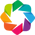

In [2]:
import glob

import holoviews as hv
import hvplot
import hvplot.xarray
import xarray as xr
import xwrf
from distributed import Client
from ncar_jobqueue import NCARCluster

hv.extension('bokeh')

## Spin up a Cluster

In [3]:
cluster = NCARCluster()
cluster.scale(10)
client = Client(cluster)
client

<Client: 'tcp://10.12.206.63:34961' processes=0 threads=0, memory=0 B>

## Grab a list of files
We are using some sample data provided by Cindy Bruyere, who works in the Mesoscale & Microscale Meteorology Lab at NCAR! She proposed this challenge of finding a more performant way of getting WRF data into the Xarray data model. The data here is from a regional model simulation over Australia!

In [4]:
files = sorted(glob.glob('/glade/scratch/bruyerec/IAG/METGRID/*.nc'))

The data are in 3 hourly chunks, with 8 timesteps per day. Let's grab the last 80 timesteps from the simulation!

In [5]:
file_subset = files[-80:]

## Examine of the files
We can open up one of the files, and inspect which variables are included, as well as descriptions of those variables!

In [6]:
wrf_ds = xr.open_dataset(files[0])
wrf_ds

<xarray.Dataset>
Dimensions:      (Time: 1, num_metgrid_levels: 38, south_north: 378, west_east: 480, num_st_layers: 4, num_sm_layers: 4, south_north_stag: 379, west_east_stag: 481, z-dimension0003: 3, z-dimension0132: 132, z-dimension0012: 12, z-dimension0016: 16, z-dimension0021: 21)
Dimensions without coordinates: Time, num_metgrid_levels, south_north, west_east, num_st_layers, num_sm_layers, south_north_stag, west_east_stag, z-dimension0003, z-dimension0132, z-dimension0012, z-dimension0016, z-dimension0021
Data variables: (12/107)
    Times        (Time) |S19 ...
    PRES         (Time, num_metgrid_levels, south_north, west_east) float32 ...
    SOIL_LAYERS  (Time, num_st_layers, south_north, west_east) float32 ...
    SM           (Time, num_sm_layers, south_north, west_east) float32 ...
    ST           (Time, num_st_layers, south_north, west_east) float32 ...
    GHT          (Time, num_metgrid_levels, south_north, west_east) float32 ...
    ...           ...
    XLONG_U      (Time, south_north, west_east_stag) float32 ...
    XLAT_U       (Time, south_north, west_east_stag) float32 ...
    XLONG_V      (Time, south_north_stag, west_east) float32 ...
    XLAT_V       (Time, south_north_stag, west_east) float32 ...
    XLONG_M      (Time, south_north, west_east) float32 ...
    XLAT_M       (Time, south_north, west_east) float32 ...
Attributes: (12/73)
    TITLE:                           OUTPUT FROM METGRID V4.3
    SIMULATION_START_DATE:           1954-02-17_00:00:00
    WEST-EAST_GRID_DIMENSION:        481
    SOUTH-NORTH_GRID_DIMENSION:      379
    BOTTOM-TOP_GRID_DIMENSION:       38
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_FRC_URB2D:                  1
    FLAG_IMPERV:                     1
    FLAG_CANFRA:                     1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

Well ***that*** wasn't super helpful. Xarray has trouble unpacking the variables in the files, primarily in regards to the coordinates! It lumps the coordinates together with the variables, makes this difficult to work with. As mentioned previously, the data are not [CF-compliant](https://cfconventions.org/) (aka it's not neccessarily Xarray's fault), which makes it challenging to parse correctly. This is where `xwrf` can help!

### Investigate the Variables
Before we read the data in using `xwrf`, we can take a look at which variables we would like to subset! The `description` attribute provides a helpful variable name, which we can take a look at using the following loop!

In [7]:
for var in wrf_ds:
    try:
        print(f'variable: {var}, description: {wrf_ds[var].description}')
    except:
        pass

variable: PRES, description: 
variable: SOIL_LAYERS, description: 
variable: SM, description: 
variable: ST, description: 
variable: GHT, description: Height
variable: SM100289, description: Soil moisture of 100-289 cm ground layer
variable: SM028100, description: Soil moisture of 28-100 cm ground layer
variable: SM007028, description: Soil moisture of 7-28 cm ground layer
variable: SM000007, description: Soil moisture of 0-7 cm ground layer
variable: ST100289, description: T of 100-289 cm ground layer
variable: ST028100, description: T of 28-100 cm ground layer
variable: ST007028, description: T of 7-28 cm ground layer
variable: ST000007, description: T of 0-7 cm ground layer
variable: SNOWH, description: Physical Snow Depth
variable: SNOW, description: Water Equivalent of Accumulated Snow Depth
variable: SST, description: Sea-Surface Temperature
variable: SEAICE, description: Sea-Ice Fraction
variable: SKINTEMP, description: Sea-Surface Temperature
variable: PMSL, description: Sea-le

Let's take a look at a couple of variables - temperature and moisture!
- Temperature
- Relative Humidity

## Read in the Dataset
Let's load in the data using the `xwrf` backend! We subset for our variables using the `preprocess` function below.

In [8]:
%%time
variables = ["PRES", "TT", "RH"]


def preprocess(ds):
    return ds[variables]


ds = xr.open_mfdataset(
    file_subset,
    engine="xwrf",
    parallel=True,
    concat_dim="Time",
    combine="nested",
    preprocess=preprocess,
    chunks={'Time': 1},
)

CPU times: user 4.94 s, sys: 1.19 s, total: 6.13 s
Wall time: 18.1 s


## Investigate the Data

In [9]:
ds

<xarray.Dataset>
Dimensions:  (Time: 80, num_metgrid_levels: 38, south_north: 378, west_east: 480)
Coordinates:
    Times    (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    CLONG    (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
    CLAT     (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
    XLONG_M  (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
    XLAT_M   (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
Dimensions without coordinates: Time, num_metgrid_levels, south_north, west_east
Data variables:
    PRES     (Time, num_metgrid_levels, south_north, west_east) float32 dask.array<chunksize=(1, 38, 378, 480), meta=np.ndarray>
    TT       (Time, num_metgrid_levels, south_north, west_east) float32 dask.array<chunksize=(1, 38, 378, 480), meta=np.ndarray>
    RH       (Time, num_metgrid_levels, south_north, west_east) float32 dask.array<chunksize=(1, 38, 378, 480), meta=np.ndarray>
Attributes: (12/73)
    TITLE:                           OUTPUT FROM METGRID V4.3
    SIMULATION_START_DATE:           2017-03-28_03:00:00
    WEST-EAST_GRID_DIMENSION:        481
    SOUTH-NORTH_GRID_DIMENSION:      379
    BOTTOM-TOP_GRID_DIMENSION:       38
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_FRC_URB2D:                  1
    FLAG_IMPERV:                     1
    FLAG_CANFRA:                     1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

### Investigate the Vertical Levels
Each of the variables as a vertical dimension of `num_metgrid_levels`, indicating the index (from 0 to 37) of the vertical level. This value isn't super helpful; what **would be helpful** is a vertical dimension corresponding to the pressure level.

If we look at a single grid point, you will notice that the bottom level (`num_metgrid_levels=0`) is the bottom pressure level. These change across time!

In [10]:
ds.PRES.isel(num_metgrid_levels=0, south_north=0, west_east=0).values

array([101763.984, 101914.88 , 102096.47 , 102343.336, 102487.016,
       102629.72 , 102679.38 , 102858.94 , 102934.56 , 102820.25 ,
       102769.125, 102777.82 , 102698.086, 102618.266, 102534.625,
       102537.375, 102484.625, 102379.58 , 102359.77 , 102492.22 ,
       102578.125, 102686.39 , 102788.92 , 102977.1  , 103049.72 ,
       103027.08 , 103026.   , 103122.66 , 103085.516, 103014.25 ,
       102992.19 , 103042.41 , 102982.3  , 102737.12 , 102663.31 ,
       102644.55 , 102549.31 , 102404.51 , 102274.69 , 102241.29 ,
       102118.38 , 102049.37 , 102067.3  , 102203.125, 102274.09 ,
       102373.07 , 102488.93 , 102695.16 , 102835.19 , 102877.78 ,
       102894.4  , 103038.38 , 103036.32 , 103004.57 , 102952.06 ,
       103012.39 , 102951.68 , 102752.   , 102648.27 , 102613.55 ,
       102496.516, 102351.45 , 102215.32 , 102282.81 , 102211.734,
       102048.64 , 101986.07 , 102015.19 , 102028.39 , 101949.195,
       101925.83 , 102046.484, 102018.53 , 101890.97 , 102007.

If we move up one more level, you will see that we now have an a pressure level that is consistent across time; which is true across the rest of these vertical levels!

In [11]:
ds.PRES.isel(num_metgrid_levels=1, south_north=0, west_east=0).values

array([100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000.], dtype=float32)

Let's subset the data between 1000 to 300 hPa!

In [12]:
ds = ds.isel(num_metgrid_levels=range(1, 21))

/glade/work/mgrover/miniconda3/envs/cesm-collections-dev/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Next, we can rename the vertical levels to `plev` which stands for pressure levels!

In [13]:
ds_to_plot = ds.rename({'num_metgrid_levels': 'plev'})
ds_to_plot

<xarray.Dataset>
Dimensions:  (Time: 80, plev: 20, south_north: 378, west_east: 480)
Coordinates:
    Times    (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    CLONG    (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
    CLAT     (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
    XLONG_M  (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
    XLAT_M   (south_north, west_east) float32 dask.array<chunksize=(378, 480), meta=np.ndarray>
Dimensions without coordinates: Time, plev, south_north, west_east
Data variables:
    PRES     (Time, plev, south_north, west_east) float32 dask.array<chunksize=(1, 20, 378, 480), meta=np.ndarray>
    TT       (Time, plev, south_north, west_east) float32 dask.array<chunksize=(1, 20, 378, 480), meta=np.ndarray>
    RH       (Time, plev, south_north, west_east) float32 dask.array<chunksize=(1, 20, 378, 480), meta=np.ndarray>
Attributes: (12/73)
    TITLE:                           OUTPUT FROM METGRID V4.3
    SIMULATION_START_DATE:           2017-03-28_03:00:00
    WEST-EAST_GRID_DIMENSION:        481
    SOUTH-NORTH_GRID_DIMENSION:      379
    BOTTOM-TOP_GRID_DIMENSION:       38
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_FRC_URB2D:                  1
    FLAG_IMPERV:                     1
    FLAG_CANFRA:                     1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

In [14]:
plevs = ds_to_plot.PRES.isel(south_north=0, west_east=0).values[0, :]
ds_to_plot['plev'] = plevs / 100
ds_to_plot['plev'].attrs['units'] = 'hPa'

### Modify the Time values as well...

The `Time` dimension has a similar issue here where the values are integers, rather than usable time values. We can modify this by setting `Time` to be equal to the time values `Times`

In [15]:
ds_to_plot['Time'] = ds.Times
ds_to_plot.Time

<xarray.DataArray 'Time' (Time: 80)>
array(['2017-03-28T03:00:00.000000000', '2017-03-28T06:00:00.000000000',
       '2017-03-28T09:00:00.000000000', '2017-03-28T12:00:00.000000000',
       '2017-03-28T15:00:00.000000000', '2017-03-28T18:00:00.000000000',
       '2017-03-28T21:00:00.000000000', '2017-03-29T00:00:00.000000000',
       '2017-03-29T03:00:00.000000000', '2017-03-29T06:00:00.000000000',
       '2017-03-29T09:00:00.000000000', '2017-03-29T12:00:00.000000000',
       '2017-03-29T15:00:00.000000000', '2017-03-29T18:00:00.000000000',
       '2017-03-29T21:00:00.000000000', '2017-03-30T00:00:00.000000000',
       '2017-03-30T03:00:00.000000000', '2017-03-30T06:00:00.000000000',
       '2017-03-30T09:00:00.000000000', '2017-03-30T12:00:00.000000000',
       '2017-03-30T15:00:00.000000000', '2017-03-30T18:00:00.000000000',
       '2017-03-30T21:00:00.000000000', '2017-03-31T00:00:00.000000000',
       '2017-03-31T03:00:00.000000000', '2017-03-31T06:00:00.000000000',
       '2017-03-31T09:00:00.000000000', '2017-03-31T12:00:00.000000000',
       '2017-03-31T15:00:00.000000000', '2017-03-31T18:00:00.000000000',
       '2017-03-31T21:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-04-01T03:00:00.000000000', '2017-04-01T06:00:00.000000000',
       '2017-04-01T09:00:00.000000000', '2017-04-01T12:00:00.000000000',
       '2017-04-01T15:00:00.000000000', '2017-04-01T18:00:00.000000000',
       '2017-04-01T21:00:00.000000000', '2017-04-02T00:00:00.000000000',
       '2017-04-02T03:00:00.000000000', '2017-04-02T06:00:00.000000000',
       '2017-04-02T09:00:00.000000000', '2017-04-02T12:00:00.000000000',
       '2017-04-02T15:00:00.000000000', '2017-04-02T18:00:00.000000000',
       '2017-04-02T21:00:00.000000000', '2017-04-03T00:00:00.000000000',
       '2017-04-03T03:00:00.000000000', '2017-04-03T06:00:00.000000000',
       '2017-04-03T09:00:00.000000000', '2017-04-03T12:00:00.000000000',
       '2017-04-03T15:00:00.000000000', '2017-04-03T18:00:00.000000000',
       '2017-04-03T21:00:00.000000000', '2017-04-04T00:00:00.000000000',
       '2017-04-04T03:00:00.000000000', '2017-04-04T06:00:00.000000000',
       '2017-04-04T09:00:00.000000000', '2017-04-04T12:00:00.000000000',
       '2017-04-04T15:00:00.000000000', '2017-04-04T18:00:00.000000000',
       '2017-04-04T21:00:00.000000000', '2017-04-05T00:00:00.000000000',
       '2017-04-05T03:00:00.000000000', '2017-04-05T06:00:00.000000000',
       '2017-04-05T09:00:00.000000000', '2017-04-05T12:00:00.000000000',
       '2017-04-05T15:00:00.000000000', '2017-04-05T18:00:00.000000000',
       '2017-04-05T21:00:00.000000000', '2017-04-06T00:00:00.000000000',
       '2017-04-06T03:00:00.000000000', '2017-04-06T06:00:00.000000000',
       '2017-04-06T09:00:00.000000000', '2017-04-06T12:00:00.000000000',
       '2017-04-06T15:00:00.000000000', '2017-04-06T18:00:00.000000000',
       '2017-04-06T21:00:00.000000000', '2017-04-07T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    Times    (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * Time     (Time) datetime64[ns] 2017-03-28T03:00:00 ... 2017-04-07

## Plot the Output using hvPlot
We can use `hvPlot` here to visualize the output. We use `quadmesh` to plot, which is able to use the coordinate information. Since we are not working with velocity variables, we use `XLONG_M` and `XLAT_M` for the longitude and latitude.

We also specify we only want our variables temperature (`TT`) and relative humidity (`RH`), grouping by the time (`Time`) and pressure level (`plev`)

In [16]:
plot = ds_to_plot.hvplot.quadmesh(
    x='XLONG_M',
    y='XLAT_M',
    z=['TT', 'RH'],
    groupby=['Time', 'plev'],
    widget_location='bottom',
    rasterize=True,
    coastline=True,
    cmap='inferno',
)
plot

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 5, 20), name='Variable', options=['TT', 'RH'], value='TT', width=250)
            [1] DiscreteSlider(margin=(0, 20, 5, 20), name='Time', options=OrderedDict([('2017-03-28 ...]), value=numpy.datetime64('2017-03-..., width=250)
            [2] DiscreteSlider(margin=(5, 20, 20, 20), name='plev', options=OrderedDict([('300', ...]), value=300.0, width=250)
        [2] HSpacer()

## Conclusions
Within this post, we covered how to read in WRF data using a new experimental package, `xwrf`! We also included some example pre-processing, and a method of plotting interactive visualizations using the WRF data! We hope this helpful within your analysis, and look forward on making more progress on these examples in the future, especially as it relates to calculations utilizing Dask!
